# 19 Working with Web Map Services - WMS 


A Web Map Service (WMS) is a standard protocol developed by the Open Geospatial Consortium in 1999 for serving georeferenced map images over the Internet. These images are typically produced by a map server from data provided by a GIS database.

The map information can be downloaded as map data and stored as array for further usage. 

Source: https://en.wikipedia.org/wiki/Web_Map_Service

<img src="../images/tutorial19_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [2]:
import gemgis as gg 

file_path ='data/19_working_with_web_map_services/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Loading the Web Map Service

Loading the Web Map Service from https://ows.terrestris.de/.

In [2]:
wms = gg.web.load_wms(url='https://ows.terrestris.de/osm/service?')
wms

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


#### Checking the type of the WMS

In [3]:
wms.identification.type

'OGC:WMS'

#### Checking the version of the WMS

In [4]:
wms.identification.version

'1.1.1'

#### Checking the title of the WMS

In [5]:
wms.identification.title

'OpenStreetMap WMS'

#### Checking the abstract of the WMS

In [6]:
wms.identification.abstract

'OpenStreetMap WMS, bereitgestellt durch terrestris GmbH und Co. KG. Beschleunigt mit MapProxy (http://mapproxy.org/)'

#### Checking the operations of the WMS

In [7]:
wms.getOperationByName('GetMap').methods

[{'type': 'Get', 'url': 'https://ows.terrestris.de/osm/service?'}]

#### Checking the format options of the WMS

In [8]:
# The different formats a layer can be saved as
wms.getOperationByName('GetMap').formatOptions

['image/jpeg', 'image/png']

#### Checking the title of a WMS layer

In [9]:
# Title of a layer
wms['OSM-WMS'].title

'OpenStreetMap WMS - by terrestris'

#### Checking the CRS options of a WMS layer

In [10]:
# Available CRS systems for a layer
wms['OSM-WMS'].crsOptions

['EPSG:25833',
 'EPSG:4326',
 'EPSG:29192',
 'EPSG:32648',
 'EPSG:5243',
 'EPSG:4674',
 'EPSG:4686',
 'EPSG:900913',
 'EPSG:2056',
 'EPSG:31466',
 'EPSG:4258',
 'EPSG:2180',
 'EPSG:2100',
 'EPSG:21781',
 'EPSG:29193',
 'EPSG:31463',
 'EPSG:3068',
 'EPSG:31467',
 'EPSG:4647',
 'EPSG:4839',
 'EPSG:31468',
 'EPSG:3857',
 'EPSG:25832',
 'EPSG:3034',
 'EPSG:3035']

#### Checking the styles of the WMS Layer

In [11]:
# Available styles
wms['OSM-WMS'].styles

{'default': {'title': 'default',
  'legend': 'https://ows.terrestris.de/osm/service?styles=&layer=OSM-WMS&service=WMS&format=image%2Fpng&sld_version=1.1.0&request=GetLegendGraphic&version=1.1.1'}}

#### Checking the bounding box of the WMS layer

In [12]:
wms['OSM-WMS'].boundingBox

(-20037508.3428, -25819498.5135, 20037508.3428, 25819498.5135, 'EPSG:900913')

#### Checking the bounding box of the WMS layer

In [13]:
wms['OSM-WMS'].boundingBoxWGS84

(-180.0, -88.0, 180.0, 88.0)

In [14]:
wms['OSM-WMS'].opaque

0

In [15]:
wms['OSM-WMS'].queryable

1

#### Getting map data for the WMS layer

In [16]:
wms_map = gg.web.load_as_map(url=wms.url,
                             layer='OSM-WMS', 
                             style='default', 
                             crs='EPSG:4647', 
                             bbox=[32286000,32328000, 5620000,5648000],
                             size=[4200, 2800], 
                             filetype='image/png')

In [17]:
wms_map

#### Converting the map data to an array

In [18]:
# Converting WMS map object to array
import io 
import matplotlib.pyplot as plt

maps = io.BytesIO(wms_map.read())
wms_array = plt.imread(maps)
wms_array[:1]

array([[[0.8039216 , 0.7647059 , 0.65882355],
        [0.85882354, 0.8784314 , 0.6627451 ],
        [0.87058824, 0.91764706, 0.6666667 ],
        ...,
        [0.78431374, 0.7647059 , 0.65882355],
        [0.8862745 , 0.9019608 , 0.81960785],
        [0.9529412 , 0.93333334, 0.9019608 ]]], dtype=float32)

#### Getting the array data for the WMS layer

This layer shows the OpenStreet Map data for the Aachen area.

In [19]:
wms_array = gg.web.load_as_array(url=wms.url,
                                 layer='OSM-WMS', 
                                 style='default', 
                                 crs='EPSG:4647', 
                                 bbox=[32286000,32328000, 5620000,5648000],
                                 size=[4200, 2800], 
                                 filetype='image/png')

wms_array[:1]

array([[[0.8039216 , 0.7647059 , 0.65882355],
        [0.85882354, 0.8784314 , 0.6627451 ],
        [0.87058824, 0.91764706, 0.6666667 ],
        ...,
        [0.78431374, 0.7647059 , 0.65882355],
        [0.8862745 , 0.9019608 , 0.81960785],
        [0.9529412 , 0.93333334, 0.9019608 ]]], dtype=float32)

#### Plotting the map data

Text(32294500, 5629750, 'Aachen')

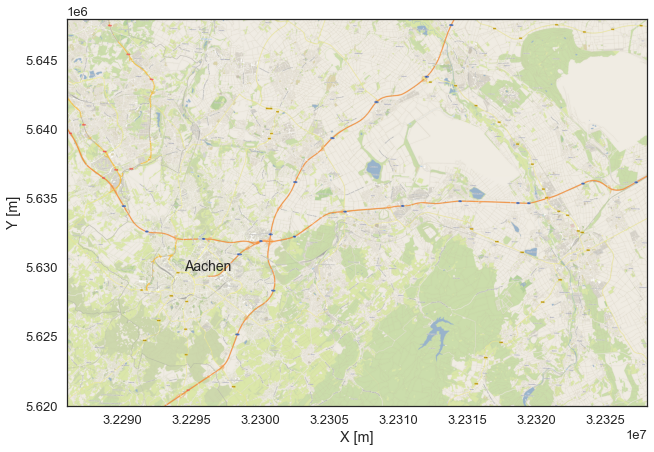

In [20]:
plt.imshow(wms_array, extent=[32286000, 32328000,5620000,5648000])
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

#### Getting map data for the WMS layer

This layer shows the hillshades of the Aachen area together with a colored digital elevation model.

In [21]:
wms_array = gg.web.load_as_array(url=wms.url,
                                 layer='SRTM30-Colored-Hillshade', 
                                 style='default', 
                                 crs='EPSG:4647', 
                                 bbox=[32286000,32328000, 5620000,5648000],
                                 size=[4200, 2800], 
                                 filetype='image/png')

wms_array[:1]

array([[[0.56078434, 0.77254903, 0.5137255 , 1.        ],
        [0.54901963, 0.7607843 , 0.5019608 , 1.        ],
        [0.5568628 , 0.76862746, 0.5058824 , 1.        ],
        ...,
        [0.49411765, 0.7490196 , 0.5058824 , 1.        ],
        [0.49411765, 0.7490196 , 0.5058824 , 1.        ],
        [0.49803922, 0.7529412 , 0.50980395, 1.        ]]], dtype=float32)

#### Plotting the map data

Text(32294500, 5629750, 'Aachen')

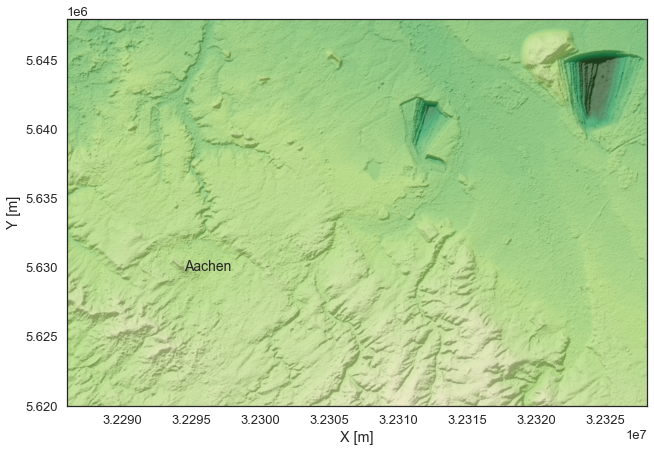

In [22]:
plt.imshow(wms_array, extent=[32286000, 32328000,5620000,5648000])
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

#### Checking the data

In [23]:
wms_array[:1]

array([[[0.56078434, 0.77254903, 0.5137255 , 1.        ],
        [0.54901963, 0.7607843 , 0.5019608 , 1.        ],
        [0.5568628 , 0.76862746, 0.5058824 , 1.        ],
        ...,
        [0.49411765, 0.7490196 , 0.5058824 , 1.        ],
        [0.49411765, 0.7490196 , 0.5058824 , 1.        ],
        [0.49803922, 0.7529412 , 0.50980395, 1.        ]]], dtype=float32)

#### Loading the WMS

The next layer represents orthophotos of the Aachen area.

In [24]:
wms = gg.web.load_wms('https://www.wms.nrw.de/geobasis/wms_nw_dop')
wms

#### Getting map data for the WMS layer

In [25]:
wms_array = gg.web.load_as_array(url=wms.url,
                                 layer='nw_dop_rgb', 
                                 style='default', 
                                 crs='EPSG:4647', 
                                 bbox=[32286000,32328000, 5620000,5648000],
                                 size=[4200, 2800], 
                                 filetype='image/png')

wms_array[:1]

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.29803923, 0.33333334, 0.3137255 , 1.        ],
        [0.3019608 , 0.33333334, 0.32941177, 1.        ],
        [0.2901961 , 0.3019608 , 0.2901961 , 1.        ]]], dtype=float32)

#### Plotting the map data

Text(32294500, 5629750, 'Aachen')

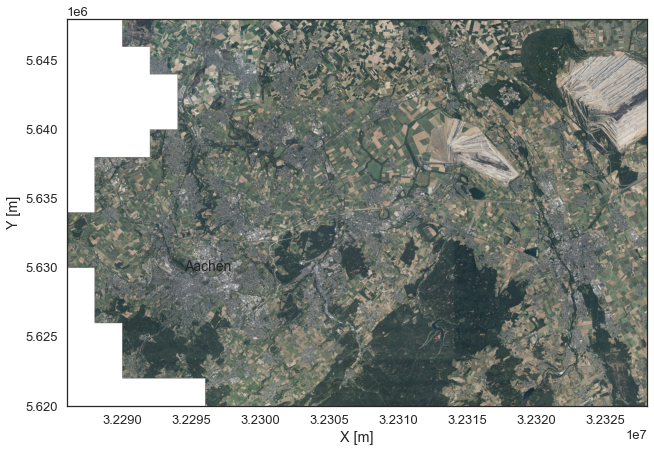

In [26]:
plt.imshow(wms_array, extent=[32286000, 32328000,5620000,5648000])
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

#### Loading the WMS

The next layer is the geological map of the Aachen area.

In [27]:
wms = gg.web.load_wms('http://www.wms.nrw.de/gd/GK100')
wms

#### Getting map data for the WMS layer

In [28]:
wms_array = gg.web.load_as_array(url=wms.url,
                                 layer='0', 
                                 style='default', 
                                 crs='EPSG:4647', 
                                 bbox=[32286000,32328000, 5620000,5648000],
                                 size=[1400,933], 
                                 filetype='image/png')

wms_array[:1]

array([[[0.9882353 , 0.87058824, 0.87058824, 1.        ],
        [0.9882353 , 0.87058824, 0.87058824, 1.        ],
        [0.9882353 , 0.87058824, 0.87058824, 1.        ],
        ...,
        [0.99607843, 0.9607843 , 0.6039216 , 1.        ],
        [0.99607843, 0.9607843 , 0.6039216 , 1.        ],
        [0.99607843, 0.9607843 , 0.6039216 , 1.        ]]], dtype=float32)

#### Plotting the map data

Text(32294500, 5629750, 'Aachen')

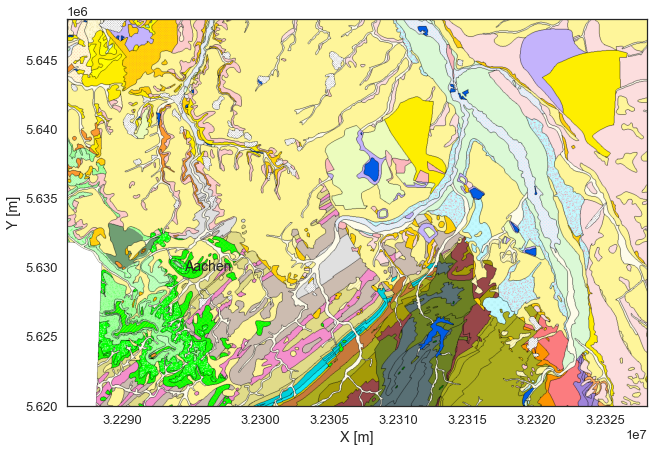

In [29]:
plt.imshow(wms_array, extent=[32286000, 32328000,5620000,5648000])
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)